# Rat OGD VAMPIRE Analysis

Teng-Jui Lin

20 May 2022

Objective: Perform VAMPIRE analysis on the rat OGD model.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import vampire as vp
from sklearn import manifold

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
vp.plot.set_plot_style()

In [2]:
img_set_path = r'C:\Files\github-projects/nance-lab-data/microfiber/0-rat-ogd-raw-data'
output_path = r'C:\Files\github-projects\nance-lab-data\microfiber\result\result-2022-05-20-rat-ogd'

In [3]:
# extract properties from all images for future use
vp.extraction.extract_properties(img_set_path)

Contour and properties data already exist in path: C:\Files\github-projects/nance-lab-data/microfiber/0-rat-ogd-raw-data
Contour and properties data already exist in path: C:\Files\github-projects/nance-lab-data/microfiber/0-rat-ogd-raw-data


,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio
0,4-50-10_40x_cortex_1_otsu_thresh.tif,0,1,15.287546,435.902930,546,151.331998,43.249832,20.983343,0.874422,0.733871,0.445714,"[[31, 32, 32, 33, 33, 34, 34, 33, 32, 32, 31, ...",0.299599,2.061151
1,4-50-10_40x_cortex_1_otsu_thresh.tif,0,2,10.072993,326.744526,137,52.870058,18.821565,10.968044,0.812660,0.796512,0.619910,"[[6, 7, 8, 10, 10, 11, 11, 12, 12, 11, 11, 10,...",0.615901,1.716037
2,4-50-10_40x_cortex_1_otsu_thresh.tif,0,3,17.034161,173.686335,322,80.390873,21.623979,20.497617,0.318534,0.851852,0.559028,"[[9, 11, 11, 12, 13, 13, 12, 13, 14, 16, 17, 1...",0.626112,1.054951
3,4-50-10_40x_cortex_1_otsu_thresh.tif,0,4,14.797945,359.595890,292,121.396970,35.454355,19.406167,0.836900,0.534799,0.421356,"[[6, 5, 5, 6, 6, 8, 9, 10, 11, 11, 12, 12, 13,...",0.248987,1.826963
4,4-50-10_40x_cortex_1_otsu_thresh.tif,0,5,16.157895,294.768421,95,38.970563,13.720758,9.320021,0.733894,0.887850,0.659722,"[[5, 6, 7, 8, 9, 10, 10, 11, 11, 8, 5, 5, 6, 5...",0.786068,1.472181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37551,4-59_4_40x_thalamus_5_yen_thresh.tif,679,58,474.028037,84.548287,321,103.704581,25.784169,17.927831,0.718716,0.777240,0.535000,"[[9, 10, 10, 11, 12, 18, 19, 19, 20, 19, 20, 1...",0.375076,1.438220
37552,4-59_4_40x_thalamus_5_yen_thresh.tif,679,59,473.782787,444.692623,244,69.840620,18.268459,17.689399,0.249779,0.856140,0.642105,"[[11, 12, 13, 13, 12, 13, 14, 16, 18, 18, 17, ...",0.628613,1.032735
37553,4-59_4_40x_thalamus_5_yen_thresh.tif,679,60,492.679487,317.794872,78,41.627417,14.753169,7.560113,0.858723,0.772277,0.650000,"[[6, 6, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 5, 3, 4,...",0.565647,1.951448
37554,4-59_4_40x_thalamus_5_yen_thresh.tif,679,61,497.462500,377.925000,80,49.213203,12.533468,9.838682,0.619505,0.701754,0.555556,"[[3, 4, 5, 6, 7, 6, 7, 8, 9, 10, 10, 9, 10, 10...",0.415085,1.273897


Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\0-rat-ogd-raw-data
Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\0-rat-ogd-raw-data


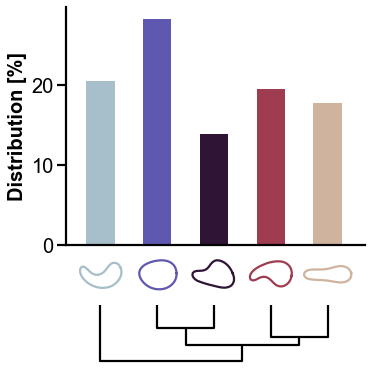

In [4]:
build_info_df = pd.DataFrame({
        'img_set_path': [img_set_path],
        'output_path': [output_path],
        'model_name': ['otsu'],
        'num_points': [np.nan],
        'num_clusters': [np.nan],
        'num_pc': [np.nan],
        'threshold': ['otsu'],
    })
vp.quickstart.build_models(build_info_df, random_state=1)

In [5]:
model_path = os.path.join(output_path, 'model_otsu_(50_5_32)__otsu.pickle')
vampire_model = vp.util.read_pickle(model_path)

Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\0-rat-ogd-raw-data
Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\0-rat-ogd-raw-data


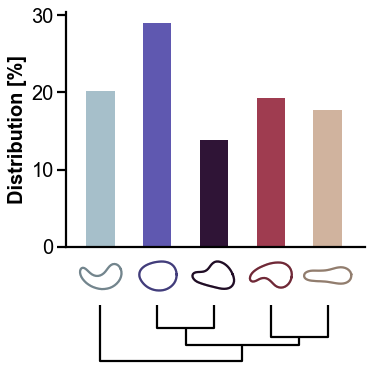

In [6]:
apply_info_df = pd.DataFrame({
        'img_set_path': [img_set_path],
        'model_path': [model_path],
        'output_path': [output_path],
        'img_set_name': ['otsu'],
    })
vp.quickstart.apply_models(apply_info_df)

In [7]:
property_path = os.path.join(output_path, 'apply-properties_otsu_on_otsu_(50_5_32)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)